This is a quick start to be used preferentially in Google Colab.
Of course, it can be adapted (expecially for the parallelization) to be used in a local machine.
More details are presented in the `README` file for this.

Have fun!

# Install the `nested_fit` package


In [ ]:
pip install nested_fit

# Install the examples

In [ ]:
import os
root_directory = os.path.expanduser("~")

In [ ]:
# Clone the program source
!git clone https://github.com/martinit18/nested_fit

In [ ]:
# Copy the folder with examples from it
import shutil
shutil.copytree("nested_fit/examples", "nf_example", dirs_exist_ok=True)
# Define the root_path
root_examples = os.path.join(root_directory, 'nf_example')

# Run nested_sampling

In [1]:
# Import main python library
import pynested_fit as pynf
import os
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib widget
#%matplotlib notebook

In [ ]:
# Go to the exercice folder USE THIS IN GOOGLE COLAB
root_path = root_directory + 'jupyter_notebooks' 
os.chdir(root_path)
# If you run the program locally, use the following command only
# root_path = os.getcwd()

In [3]:
# Change directory
path = root_path + '/res_1gauss_bg'
os.chdir(path)

In [ ]:
# Define inputs using a "latex" function
conf = pynf.Configurator(
    calculation_mode='DATA',    # Type of calculation (DATA for data, POTENTIAL for potential landscapes, INTEGRAL for function integrals)
    datafiles=['he-histo.dat'], # Name of the data file
    filefmt='.tsv',             # Format of file (here for tab and space separated)
    specstr='x,c',              # Datafile layout (here ch. and counts in ch.)
    expressions=[               # function expression in latex form
        r'gauss_bg(x, A_1, x_1, s, b_g) = A_1 / (s \sqrt{2\pi}) \exp{-(x-x_1)^2/(2s^2)} + b_g'],
    params={                    # Parameters boundaries and co.
        'b_g': {'value': 0.01,  'step': -1, 'min': 0,   'max': 0.3 },
        'x_1': {'value': 454.6, 'step': -1, 'min': 300, 'max': 600 },
        'A_1': {'value': 300,   'step': -1, 'min': 0,   'max': 500 },
        's':   {'value': 20,    'step': -1, 'min': 10,  'max': 30  }
    },
    data={'xmin': 250, 'xmax': 650},  # Boundaries of data
    livepoints=1000,                  # Number of live points
    # search_method='SLICE_SAMPLING', # Search method
    # search_params=(0.5, 3),         # Parameters of chosen method
    # search_maxsteps=100000,         # Max steps of nested sampling
    conv_accuracy=1.E-05,             # Evidence final accuracy
    # cluster_enable=False,           # clustering recognition on/off
    # cluster_method='k',             # method used
    # cluster_parameter1=0.5,         # method parameter 1 (if needed)
    # cluster_parameter2=0.2,         # method parameter 1 (if needed)
)

In [ ]:
# Run the code

# For visualising the progress of the execution use this command
# out = conf.sample(output_mode='live')
# If nothing shows, use simply the command (symlink to created or version to be used) USE THIS IN GOOGLE COLAB
!nested_fit

# For silently running the code and save the raw output in a dictionnary, use this command
# out = conf.sample(output_mode='none'

# Visualization of output data and post-calculations

In [6]:
# Load the nested output data
# The available parameters and other variables that can be plotted are listed
an = pynf.Analysis()

Current path =  .
['A_1', 'x_1', 's', 'b_g']
Index(['weight', 'lnlikelihood', 'A_1', 'x_1', 's', 'b_g'], dtype='object')
Available parameters : ['weight', 'lnlikelihood', 'A_1', 'x_1', 's', 'b_g']


0 max
nf_output_data_max.dat


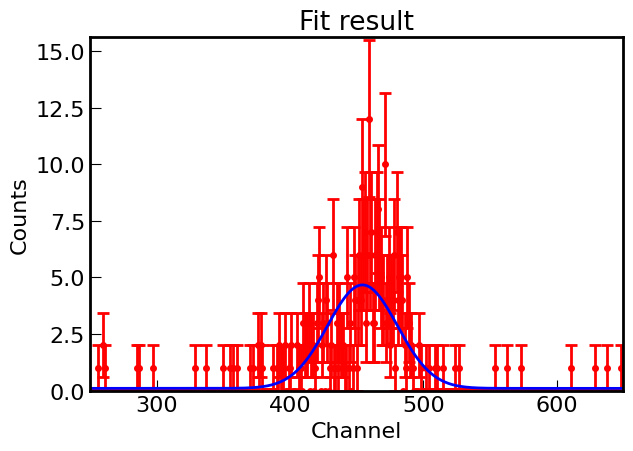

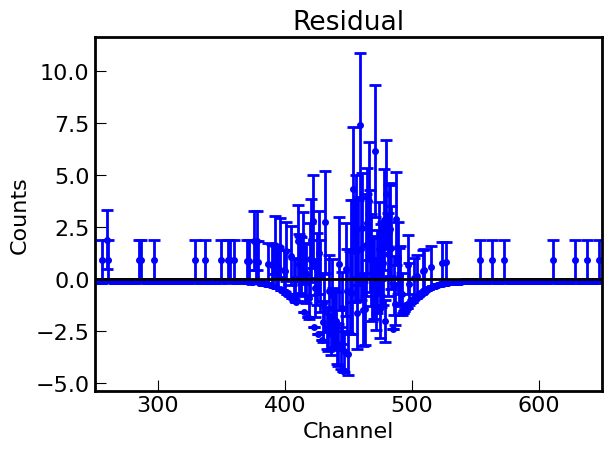

In [7]:
# Plot the data with the best fit (parameters corresponding to the maximum value of the data) and residual
# Other choices are median and mean parameters values selectable with "typeof='mean'" and "typeof='median'"
an.plot()

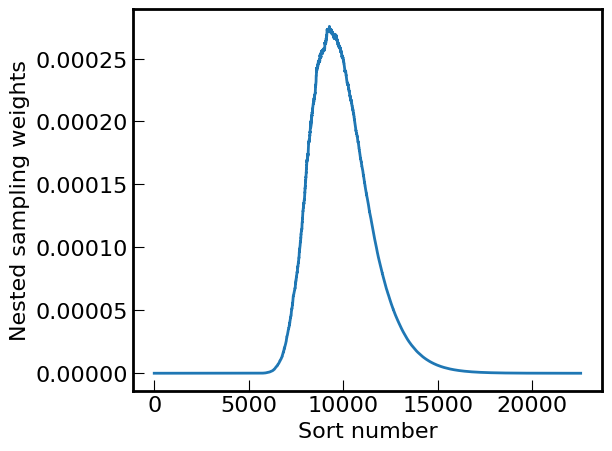

In [8]:
# Plot the weights of nested sampling corresponding to w_n = Delta X_n L_n
an.plot_weights()

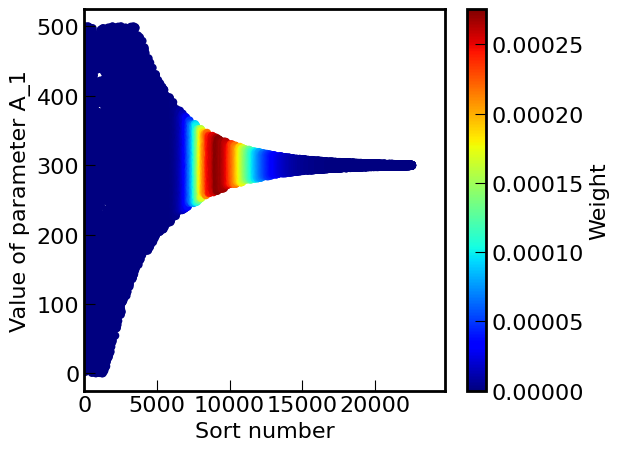

In [9]:
# Plot the parameter convergence
# Colored regions correspond to the high value of the weights
an.plot_par('A_1')

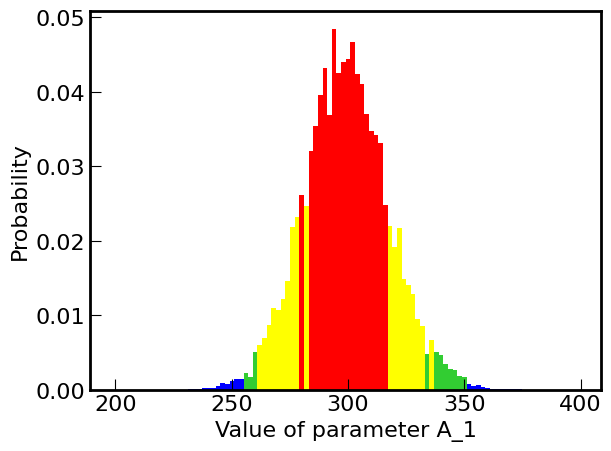

In [10]:
# Plot one parameter histogram
# Red, yellow and green region correspond to 1,2,3 sigmas
an.histo('A_1',bins=100,xmin=200,xmax=400)

/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1108: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data68[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb68)
/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1109: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data95[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb95)
/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1110: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data99[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb99)
/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1111: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data_rest[::-1,]),interpolation='nearest',extent=extent,aspect='aut

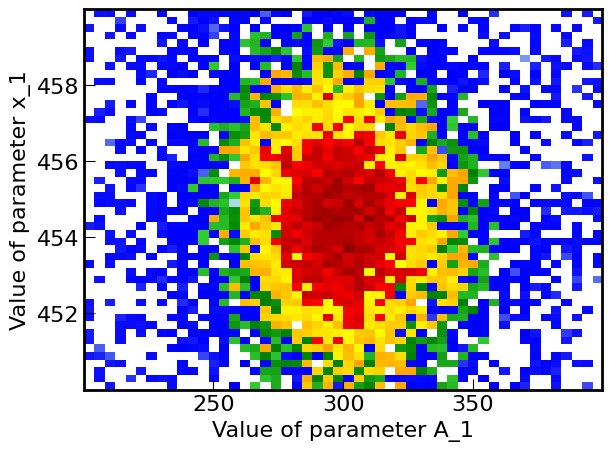

In [11]:
# Plot one parameter histogram
# Red, yellow and green region correspond to 1,2,3 sigmas
an.histo2D('A_1','x_1',bins=50,xmin=200,xmax=400,ymin=450,ymax=460)

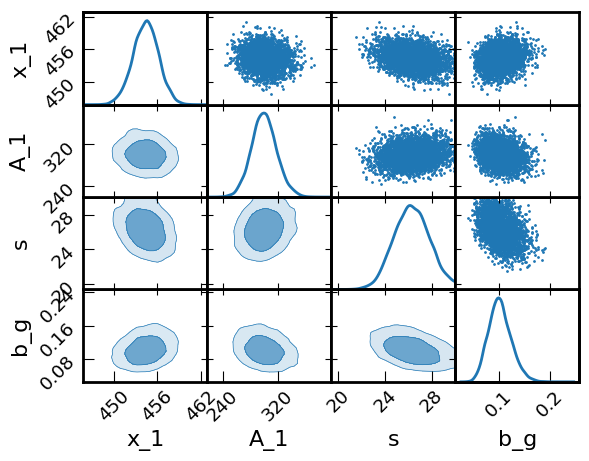

In [12]:
# Triangle plot (from anesthetic) to have a look to all parameters at the same time
an.triangle_plot(['x_1','A_1','s','b_g'])

In [13]:
# Statistics (from anesthetic) to have a good estimation of the uncertainties (expecially for the evidence)
an.stats()

logZ 	 = -338.272901 	± 0.094014
D_KL 	 = 8.083838 	± 0.088253
logL_P 	 = -330.189063 	± 0.028780
d_G 	 = 3.788851 	± 0.088001
